Sumber dataset: https://www.kaggle.com/datasets/portiamurray/anomaly-detection-smart-meter-data-sample/data

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
data = pd.read_excel('kWh_Meter_Data.xlsx')
data.head()

,Datum Zeit,Messung Gebäude 2ewz [kWh]
0,2016-01-01 00:15:00,2.85
1,2016-01-01 00:30:00,2.85
2,2016-01-01 00:45:00,3.00
3,2016-01-01 01:00:00,2.94
4,2016-01-01 01:15:00,2.79


In [13]:
# ganti nama kolom
data.columns = ['datetime','kWh']
data = data.set_index('datetime')
data = data[~data.index.duplicated(keep='first')] 
data.head(10)

,kWh
datetime,
2016-01-01 00:15:00,2.85
2016-01-01 00:30:00,2.85
2016-01-01 00:45:00,3.00
2016-01-01 01:00:00,2.94
2016-01-01 01:15:00,2.79
2016-01-01 01:30:00,2.79
2016-01-01 01:45:00,2.70
2016-01-01 02:00:00,2.73
2016-01-01 02:15:00,2.67


Data sepertinya diambil setiap 15 menit sekali

C:\Users\perso\AppData\Local\Temp\ipykernel_32208\1019510360.py:11: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


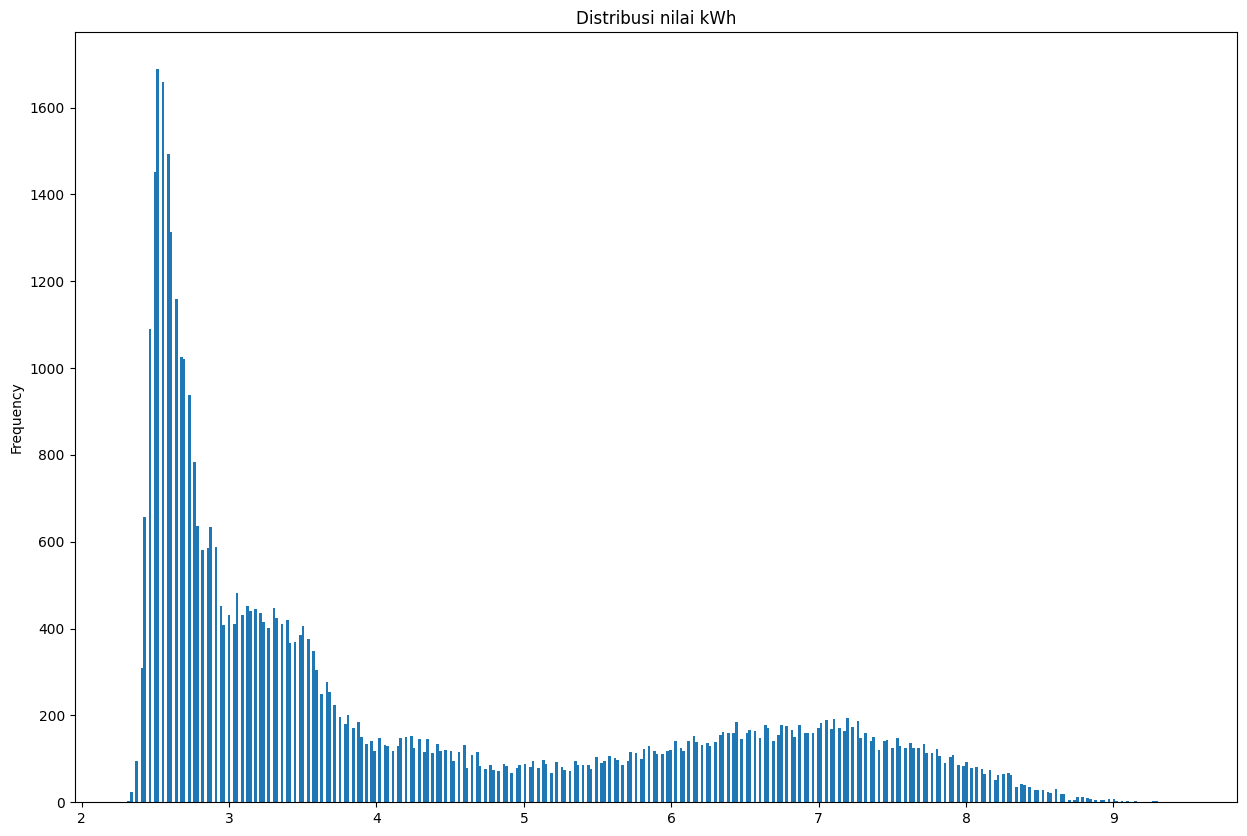

In [14]:

plt.rcParams['figure.figsize'] = [15, 10]
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.set_facecolor('#FFFFFF')
ax.set_title('Distribusi nilai kWh')
ax.set_xlabel('kWh')
ax.set_ylabel('Frequency')
ax.tick_params(colors='k')
ax.yaxis.label.set_color('k')
ax.xaxis.label.set_color('k')
data['kWh'].plot(kind = 'hist', bins = 400)
fig.show()

In [15]:
data.dtypes

kWh    float64
dtype: object

In [16]:
data.tail()

,kWh
datetime,
2017-05-10 23:00:00,3.60
2017-05-10 23:15:00,3.51
2017-05-10 23:30:00,3.60
2017-05-10 23:45:00,3.51
2017-05-11 00:00:00,3.57


In [17]:
data.info

<bound method DataFrame.info of                       kWh
datetime                 
2016-01-01 00:15:00  2.85
2016-01-01 00:30:00  2.85
2016-01-01 00:45:00  3.00
2016-01-01 01:00:00  2.94
2016-01-01 01:15:00  2.79
...                   ...
2017-05-10 23:00:00  3.60
2017-05-10 23:15:00  3.51
2017-05-10 23:30:00  3.60
2017-05-10 23:45:00  3.51
2017-05-11 00:00:00  3.57

[47577 rows x 1 columns]>

data dari 01 Januari 2016 - 11 Mei 2017 dan terdiri dari 47580 data point

In [18]:
#cek data hilang dan duplikat
missing_values = data.isnull().sum()
duplicate_values = data.duplicated().sum()

missing_values, duplicate_values

(kWh    0
 dtype: int64,
 47344)

Kita buat dataframe baru karena bisa jadi ada data point yang hilang (misal satu timestamp hilang) 

In [19]:
# buat dataframe baru dengan range waktu yang sama dan logging setiap 15 menit
from datetime import datetime, timedelta

def datetime_df(start,stop,step):
    current = start
    while current < stop:
        yield current
        current += step

In [20]:
start, stop = data.index[0],data.index[-1]
start,stop

(Timestamp('2016-01-01 00:15:00'), Timestamp('2017-05-11 00:00:00'))

In [21]:
#buat dataframe baru setiap 15 menit sekalian cek apabila ada missing values

df = pd.DataFrame(datetime_df(start,stop, timedelta(minutes=15)))
df.columns = ['datetime']
df['kWh'] = np.nan #kita kosongin dulu nilai kWh nya
df = df.set_index('datetime')
df.head()

,kWh
datetime,
2016-01-01 00:15:00,NaN
2016-01-01 00:30:00,NaN
2016-01-01 00:45:00,NaN
2016-01-01 01:00:00,NaN
2016-01-01 01:15:00,NaN


In [22]:
#sekarang kita isi kWh dengan data sebelumnya, jadi akan ketahuan jika ada data kosong
for index,row in df.iterrows():
    if index in data.index:
        df.loc[index]['kWh'] = data.loc[index]['kWh']
    else:
        print('data kosong pada: ',index)

C:\Users\perso\AppData\Local\Temp\ipykernel_32208\804389555.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df.loc[index]['kWh'] = data.loc[index]['kWh']


data kosong pada:  2016-03-27 02:00:00
data kosong pada:  2016-03-27 02:15:00
data kosong pada:  2016-03-27 02:30:00
data kosong pada:  2016-03-27 02:45:00
data kosong pada:  2016-11-10 01:45:00
data kosong pada:  2017-02-24 00:00:00
data kosong pada:  2017-02-24 00:15:00
data kosong pada:  2017-02-24 00:30:00
data kosong pada:  2017-02-24 00:45:00
data kosong pada:  2017-02-24 01:00:00
data kosong pada:  2017-02-24 01:15:00
data kosong pada:  2017-02-24 01:30:00
data kosong pada:  2017-02-24 01:45:00
data kosong pada:  2017-02-24 02:00:00
data kosong pada:  2017-02-24 02:15:00
data kosong pada:  2017-02-24 02:30:00
data kosong pada:  2017-02-24 02:45:00
data kosong pada:  2017-02-24 03:00:00
data kosong pada:  2017-02-24 03:15:00
data kosong pada:  2017-02-24 03:30:00
data kosong pada:  2017-02-24 03:45:00
data kosong pada:  2017-02-24 04:00:00
data kosong pada:  2017-02-24 04:15:00
data kosong pada:  2017-02-24 04:30:00
data kosong pada:  2017-02-24 04:45:00
data kosong pada:  2017-0

Tambahkan kolom 'tanggal', 'jam', 'weekday'

In [23]:
df.reset_index(inplace = True)
df['date'] = df.apply(lambda row: row['datetime'].date(), axis = 1)
df['weekday'] = df.apply(lambda row: row['datetime'].weekday(), axis = 1)
df['workday'] = df.apply(lambda row: row['weekday'] < 5, axis = 1)
df['hour'] = df.apply(lambda row: row['datetime'].hour, axis = 1)

In [24]:
df.head()

,datetime,kWh,date,weekday,workday,hour
0,2016-01-01 00:15:00,2.85,2016-01-01,4,True,0
1,2016-01-01 00:30:00,2.85,2016-01-01,4,True,0
2,2016-01-01 00:45:00,3.00,2016-01-01,4,True,0
3,2016-01-01 01:00:00,2.94,2016-01-01,4,True,1
4,2016-01-01 01:15:00,2.79,2016-01-01,4,True,1


In [25]:
df.dtypes

datetime    datetime64[ns]
kWh                float64
date                object
weekday              int64
workday               bool
hour                 int64
dtype: object

In [26]:
missing_values = df['kWh'].isna().sum()
missing_values

39

Kita isi data hilang dengan metode forward fill

In [27]:
# Apply forward fill to handle missing values
data['kWh'] = data['kWh'].fillna(method='ffill')

# Verify that there are no more missing values in the 'kWh' column
missing_values_after_fill = data['kWh'].isna().sum()
missing_values_after_fill

C:\Users\perso\AppData\Local\Temp\ipykernel_32208\4062441663.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['kWh'] = data['kWh'].fillna(method='ffill')


0

In [28]:
summary_stats = data.describe()
summary_stats

,kWh
count,47577.000000
mean,4.184355
std,1.821039
min,2.310000
25%,2.670000
50%,3.330000
75%,5.760000
max,9.480000


In [29]:
df.shape

(47615, 6)

In [30]:
df['date'] = pd.to_datetime(df['date'])
df.dtypes

datetime    datetime64[ns]
kWh                float64
date        datetime64[ns]
weekday              int64
workday               bool
hour                 int64
dtype: object

In [31]:
df.drop(df[df['date'] <= '2016-01-03'].index, inplace=True)
df.drop(df[df['date'] >= '2017-01-02'].index, inplace=True)
new_min_date = df['date'].min()
new_max_date = df['date'].max()


new_min_date, new_max_date, df.head()

(Timestamp('2016-01-04 00:00:00'),
 Timestamp('2017-01-01 00:00:00'),
                datetime   kWh       date  weekday  workday  hour
 287 2016-01-04 00:00:00  2.70 2016-01-04        0     True     0
 288 2016-01-04 00:15:00  2.73 2016-01-04        0     True     0
 289 2016-01-04 00:30:00  2.64 2016-01-04        0     True     0
 290 2016-01-04 00:45:00  2.79 2016-01-04        0     True     0
 291 2016-01-04 01:00:00  2.70 2016-01-04        0     True     1)

In [32]:
df.reset_index(drop=True, inplace=True)
df.head()

,datetime,kWh,date,weekday,workday,hour
0,2016-01-04 00:00:00,2.70,2016-01-04,0,True,0
1,2016-01-04 00:15:00,2.73,2016-01-04,0,True,0
2,2016-01-04 00:30:00,2.64,2016-01-04,0,True,0
3,2016-01-04 00:45:00,2.79,2016-01-04,0,True,0
4,2016-01-04 01:00:00,2.70,2016-01-04,0,True,1


In [33]:
unique_date = df['date'].nunique()
print(unique_date)

364


In [34]:
df['week'] = df['datetime'].dt.isocalendar().week
df.head()

,datetime,kWh,date,weekday,workday,hour,week
0,2016-01-04 00:00:00,2.70,2016-01-04,0,True,0,1
1,2016-01-04 00:15:00,2.73,2016-01-04,0,True,0,1
2,2016-01-04 00:30:00,2.64,2016-01-04,0,True,0,1
3,2016-01-04 00:45:00,2.79,2016-01-04,0,True,0,1
4,2016-01-04 01:00:00,2.70,2016-01-04,0,True,1,1


In [35]:
unique_week = df['week'].nunique()
print(unique_week)

52


In [36]:
df['continuous_hour'] = df['weekday'] * 24 + df['hour']
df.head()

,datetime,kWh,date,weekday,workday,hour,week,continuous_hour
0,2016-01-04 00:00:00,2.70,2016-01-04,0,True,0,1,0
1,2016-01-04 00:15:00,2.73,2016-01-04,0,True,0,1,0
2,2016-01-04 00:30:00,2.64,2016-01-04,0,True,0,1,0
3,2016-01-04 00:45:00,2.79,2016-01-04,0,True,0,1,0
4,2016-01-04 01:00:00,2.70,2016-01-04,0,True,1,1,1


In [37]:
df.head()

,datetime,kWh,date,weekday,workday,hour,week,continuous_hour
0,2016-01-04 00:00:00,2.70,2016-01-04,0,True,0,1,0
1,2016-01-04 00:15:00,2.73,2016-01-04,0,True,0,1,0
2,2016-01-04 00:30:00,2.64,2016-01-04,0,True,0,1,0
3,2016-01-04 00:45:00,2.79,2016-01-04,0,True,0,1,0
4,2016-01-04 01:00:00,2.70,2016-01-04,0,True,1,1,1


Text(0.5, 1.0, 'Rata-rata konsumsi berdasarkan hari')

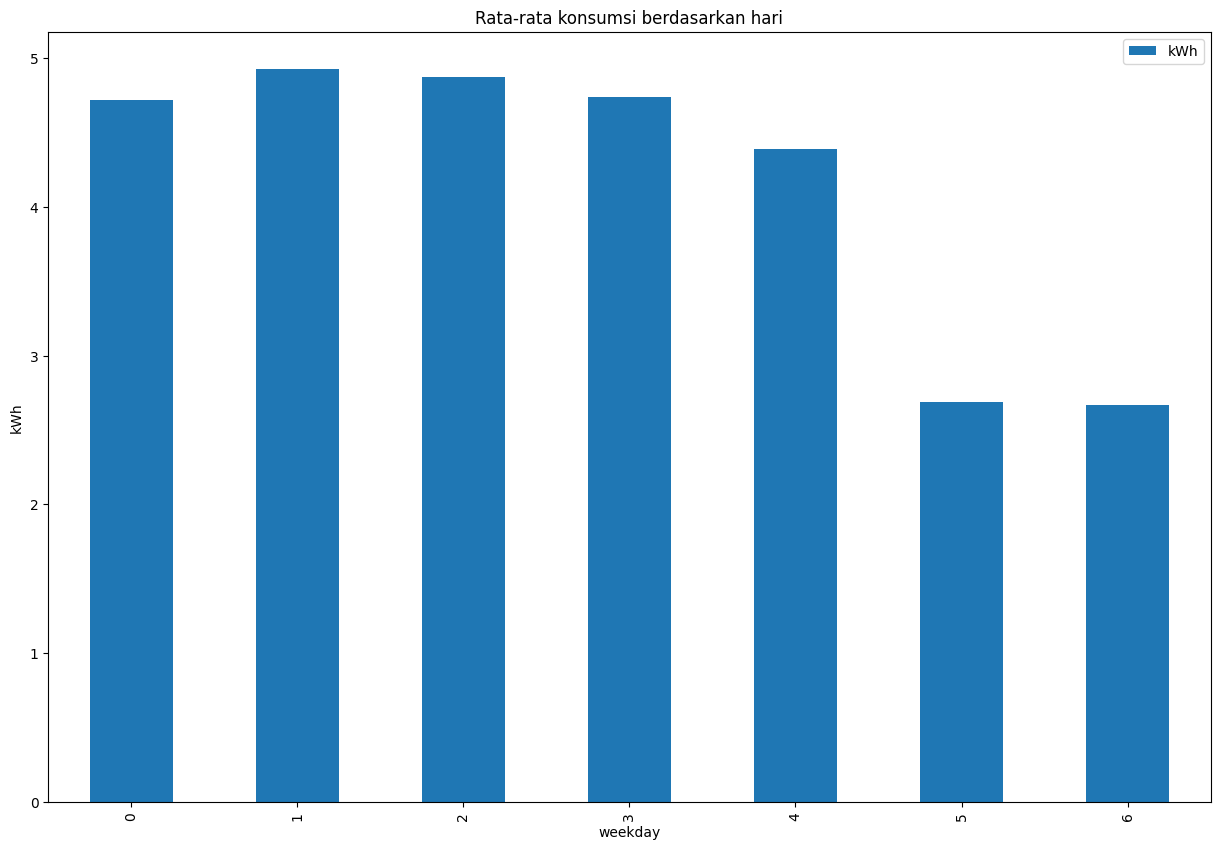

In [50]:
df[['weekday', 'kWh']].groupby(['weekday']).mean().plot(kind = 'bar')
plt.ylabel('kWh')
plt.title('Rata-rata konsumsi berdasarkan hari')

Sabtu minggu lebih sedikit kemungkinan data ini adalah gedung kantor sehingga konsumsi energi hari sabtu dan minggu lebih sedikit

In [43]:
df['hour'] = df.apply(lambda row: row['datetime'].hour, axis=1)

Text(0, 0.5, 'kWh')

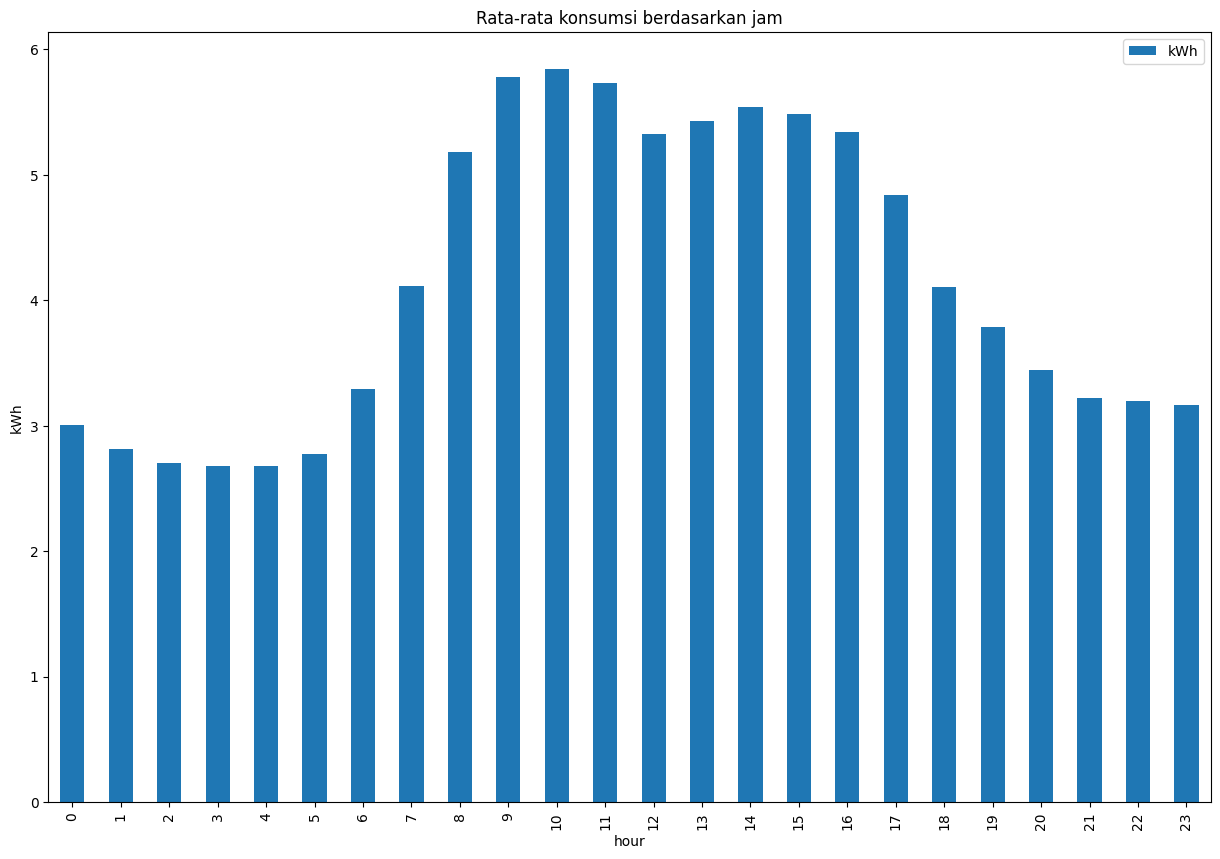

In [51]:

df[['hour', 'kWh']].groupby(['hour']).mean().plot(kind = 'bar')
plt.title('Rata-rata konsumsi berdasarkan jam')
plt.ylabel('kWh')

Konsumsi tinggi di jam kerja

Text(0, 0.5, 'kWh')

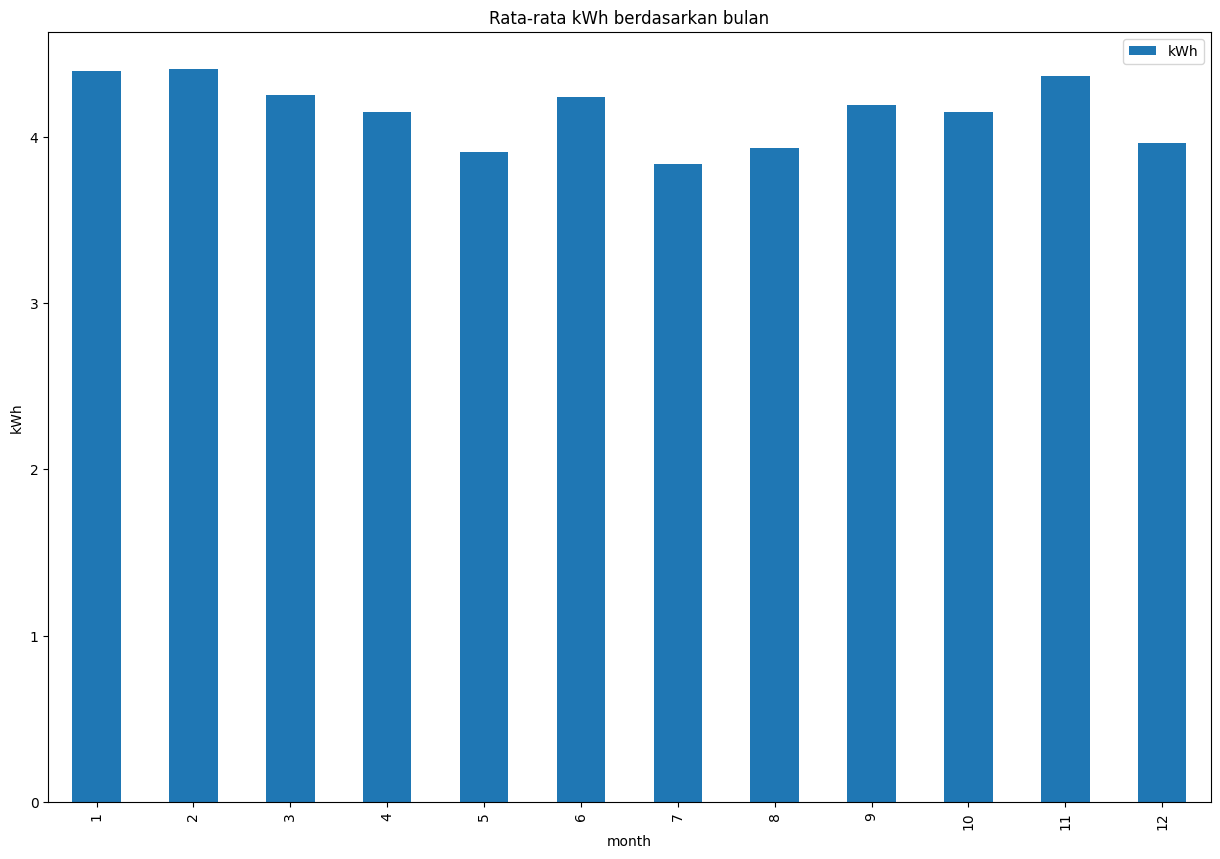

In [53]:

df['month'] = df.apply(lambda row: row['datetime'].month, axis=1)
df[['month', 'kWh']].groupby(['month']).mean().plot(kind = 'bar')
plt.title('Rata-rata kWh berdasarkan bulan')
plt.ylabel('kWh')

Tidak terlalu berbeda antar bulannya

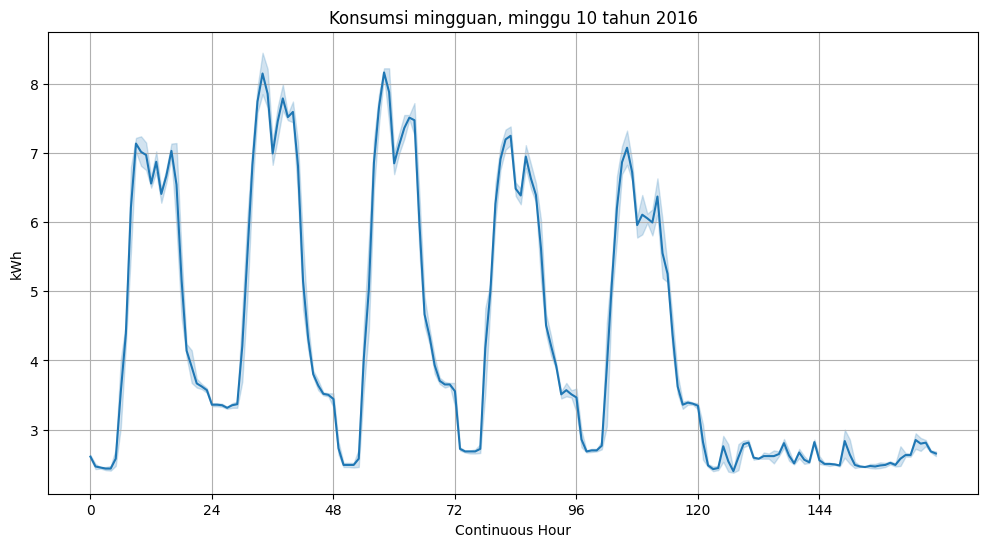

In [55]:
def PlotWeeklyPattern(week_to_plot):
    filtered_data = df[(df['week'] == week_to_plot)]

# Plot kWh vs continuous hour for the specified week using Seaborn's lineplot
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=filtered_data, x='continuous_hour', y='kWh') 
    plt.title(f'Konsumsi mingguan, minggu {week_to_plot} tahun 2016')
    plt.xlabel('Continuous Hour')
    plt.ylabel('kWh')
    plt.grid(True)
    plt.xticks(range(0, 168, 24))  # Tick marks every 24 hours
    plt.show()

PlotWeeklyPattern(10)

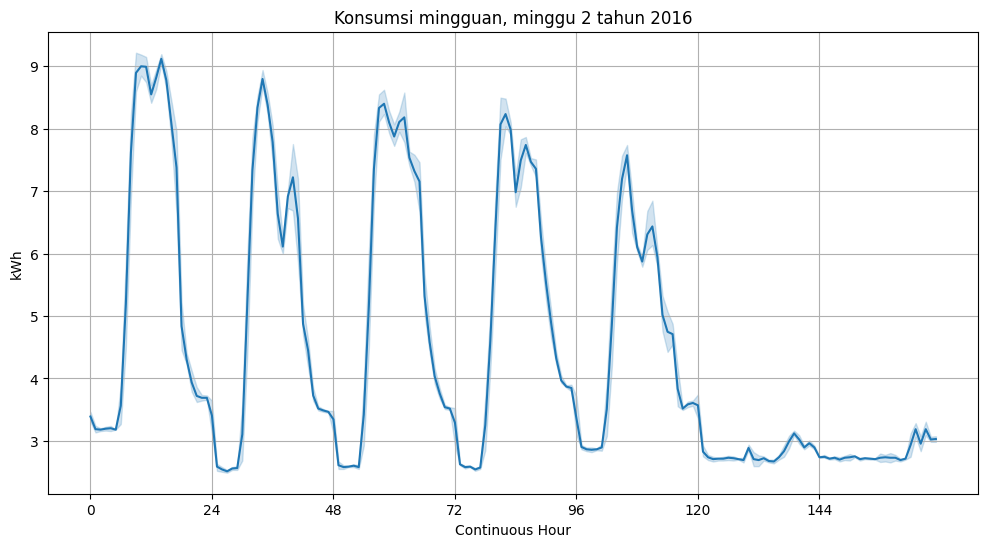

In [56]:
PlotWeeklyPattern(2)

Konsumsi mingguan menunjukkan suatu pola yang berulang yang bisa digunakan sebagai model training untuk model anomaly detection

In [39]:
#save last updated data, data ini sudah bisa diplot untuk mendapatkan weekly patterns, range data 52 minggu, 364 hari, mulai dari 04 Januari 2016(senin)
#df.to_csv('FinalData.csv', index=False)